In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
early_warning_url = "data_exp_3.csv"
early_warning = pd.read_csv(early_warning_url, sep=";")
early_warning

,Unnamed: 0,total_ips_origem,total_ips_destino,total_pacotes,5_kurt_total_ips_origem,5_skw_total_ips_destino,5_coefficient_variation_total_pacotes,has_bot
0,0,2,2,4,NaN,NaN,NaN,0
1,1,0,0,0,NaN,NaN,NaN,0
2,2,8,8,31,NaN,NaN,NaN,0
3,3,3,4,6,NaN,NaN,NaN,1
4,4,6,8,28,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
2019,2019,11,12,46,9.636461,2.342618,2.914932,1
2020,2020,15,14,69,9.135285,2.277108,2.897143,1
2021,2021,13,13,54,8.909651,2.233118,2.882173,1
2022,2022,11,11,56,8.800780,2.215310,2.875550,0


In [3]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation

class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)
        
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [5]:
idioma = 'en'
labels_traducao = []
if idioma == 'en':
    labels_traducao = ['\n\nKurtosis of total \nsource IPs',
                      '\n\nCV of total packets',
                       '\n\nSkewness of total \ndestination IPs',
                       'Group 1',
                       'Group 2',
                       'Normal interval',
                       'Malicious interval',
                       '\n\nTotal source IPs',
                        '\n\nTotal packages',
                        '\n\nTotal destination IPs',
                      ]

In [6]:
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes' ]
limit = 159
init = 101
x_train = early_warning[colunas].copy()[init:limit]
y_real = early_warning['has_bot'][init:limit]
x_train = x_train.fillna(0)
clustering = KMeans(n_clusters=2, random_state=0).fit(x_train)    
y_test = clustering.labels_
y_test = [0 if i == 1 else 1 for i in clustering.labels_]
print(confusion_matrix(y_real, y_test))
print(classification_report(y_real, y_test, digits=4))

[[33  7]
 [10  8]]
              precision    recall  f1-score   support

           0     0.7674    0.8250    0.7952        40
           1     0.5333    0.4444    0.4848        18

    accuracy                         0.7069        58
   macro avg     0.6504    0.6347    0.6400        58
weighted avg     0.6948    0.7069    0.6989        58



<Figure size 432x288 with 0 Axes>

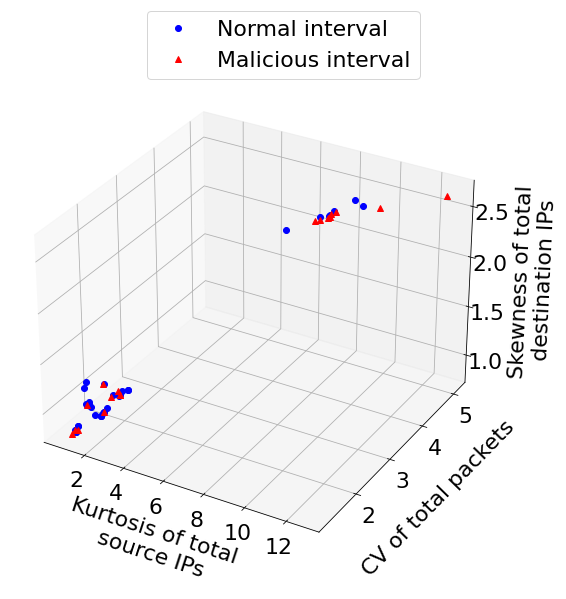

<Figure size 432x288 with 0 Axes>

In [7]:
colunas = ['5_kurt_total_ips_origem', '5_skw_total_ips_destino', '5_coefficient_variation_total_pacotes',
           'has_bot']
          
dataframe = early_warning[colunas][init:limit]
dataframe['y_test'] = y_test
df1= dataframe.query('has_bot == 0')                                
df2= dataframe.query('has_bot == 1')  

plt.clf()

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")
font_size = 22

ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

ax2.set_xlabel(labels_traducao[0], fontsize=font_size)
ax2.set_ylabel(labels_traducao[1], fontsize=font_size)
ax2.set_zlabel(labels_traducao[2], fontsize=font_size)


ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label=labels_traducao[5], c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label=labels_traducao[6], c='red')


fig2.legend(loc="upper center",prop={'size': font_size})
plt.show()
plt.clf()

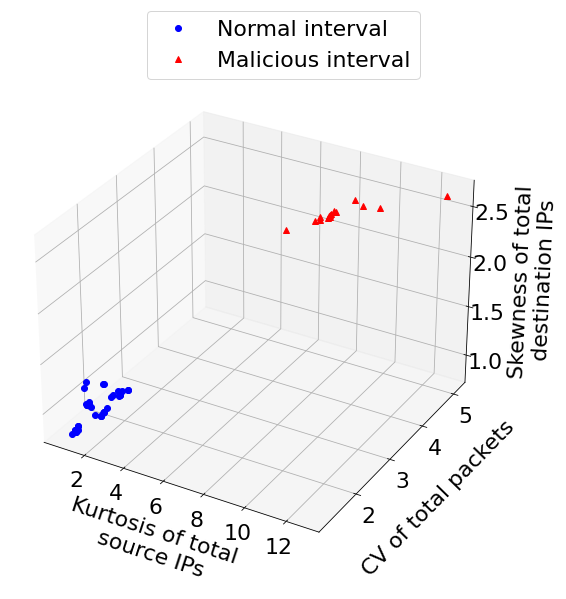

In [8]:
df1= dataframe.query('y_test == 0')                                
df2= dataframe.query('y_test == 1')  

fig2 = plt.figure(figsize = (9, 9))
ax2 = plt.axes(projection ="3d")

ax2.xaxis.set_tick_params(labelsize=font_size)
ax2.yaxis.set_tick_params(labelsize=font_size)
ax2.zaxis.set_tick_params(labelsize=font_size)
c = [ "blue" if i == 0 else "red" for i in y_test]

ax2.set_xlabel(labels_traducao[0], fontsize=font_size)
ax2.set_ylabel(labels_traducao[1], fontsize=font_size)
ax2.set_zlabel(labels_traducao[2], fontsize=font_size)

ax2.plot(df1[colunas[0]], df1[colunas[2]],df1[colunas[1]] , "o", label=labels_traducao[5], c='blue')
ax2.plot(df2[colunas[0]], df2[colunas[2]],df2[colunas[1]] , "^", label=labels_traducao[6], c='red')
fig2.legend(loc="upper center",prop={'size': font_size})
plt.show()